<a href="https://colab.research.google.com/github/RandivCosta/data-analysis/blob/main/Correlation_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Correlation analysis

In [ ]:
import os
import pandas as pd
# import json
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# output_dir = "heatmaps"
# os.makedirs(output_dir, exist_ok=True)

df = pd.read_csv('adjusted_data.csv')
df['Week'] = pd.factorize(df['Week'])[0] + 1

areas = sorted(df['Area'].unique())
bacterial_names = df.columns[df.columns.str.contains('BC-')].tolist()
separate_bacterial_coefficients = {} # to store coefficients

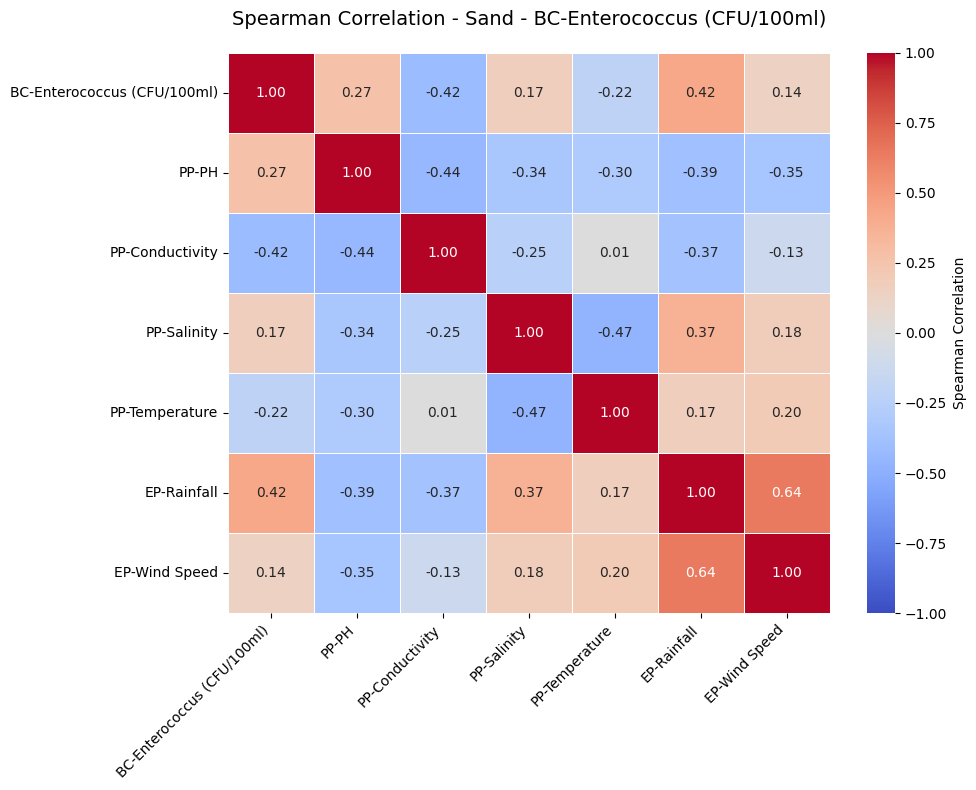

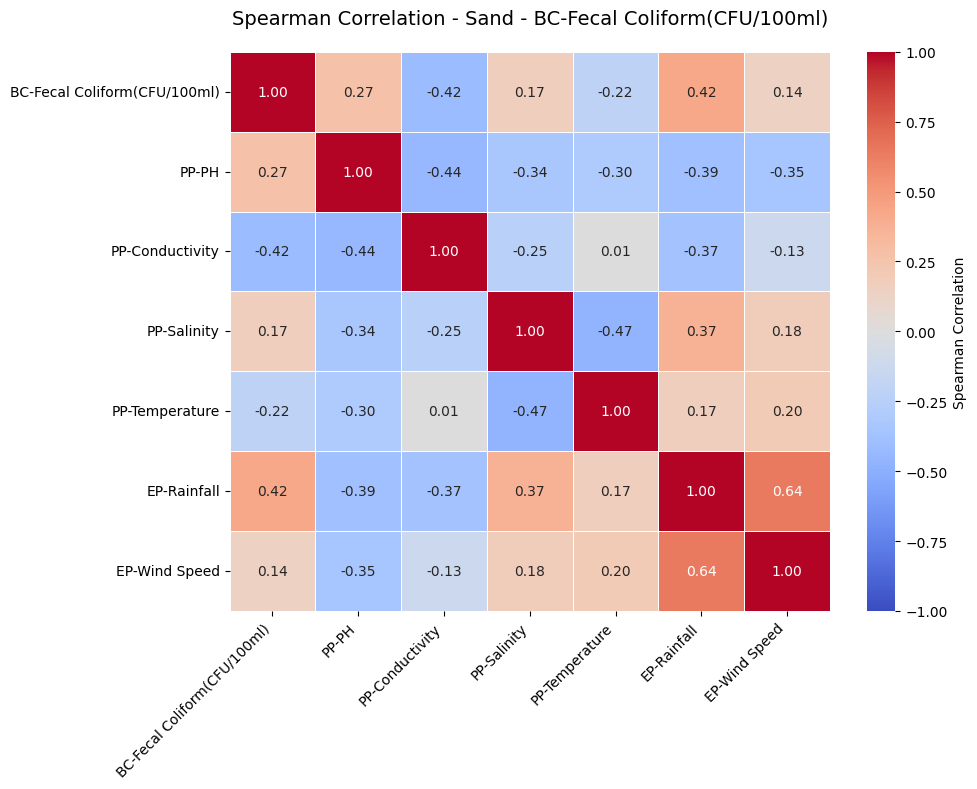

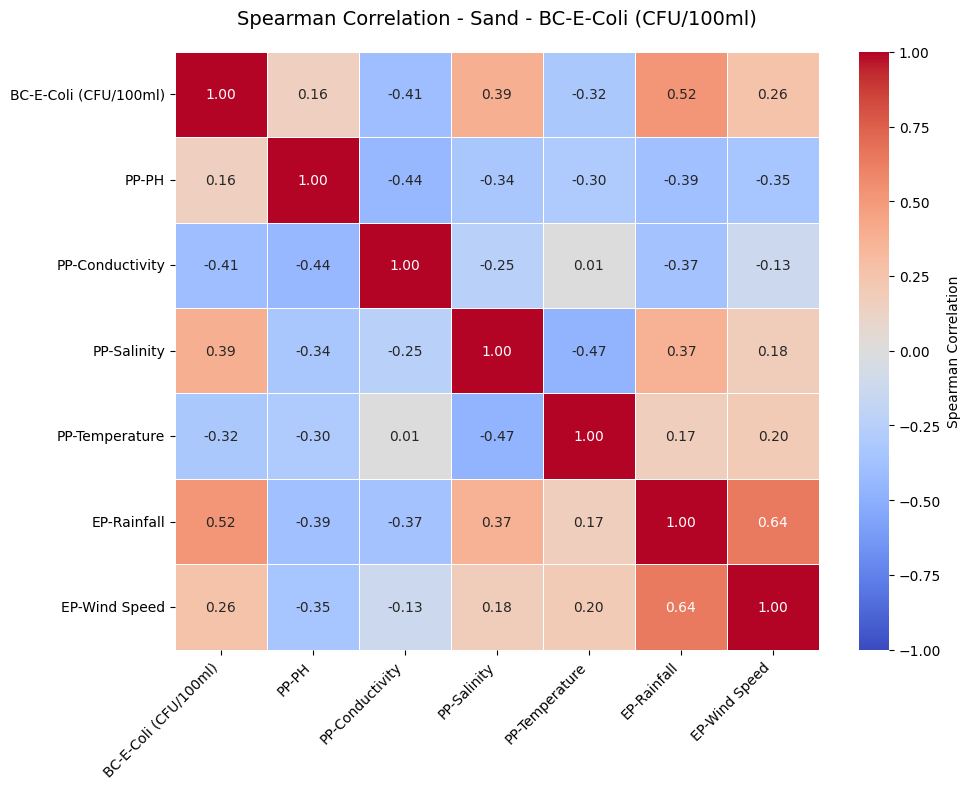

correlation coefficients for Mean Bacterial Count in Sand:
PP-PH                 0.236364
PP-Conductivity      -0.442424
PP-Salinity           0.253012
PP-Temperature       -0.259304
EP-Rainfall           0.509241
EP-Wind Speed         0.224242
Mean_BC(CFU/100ml)    1.000000
Name: Mean_BC(CFU/100ml), dtype: float64


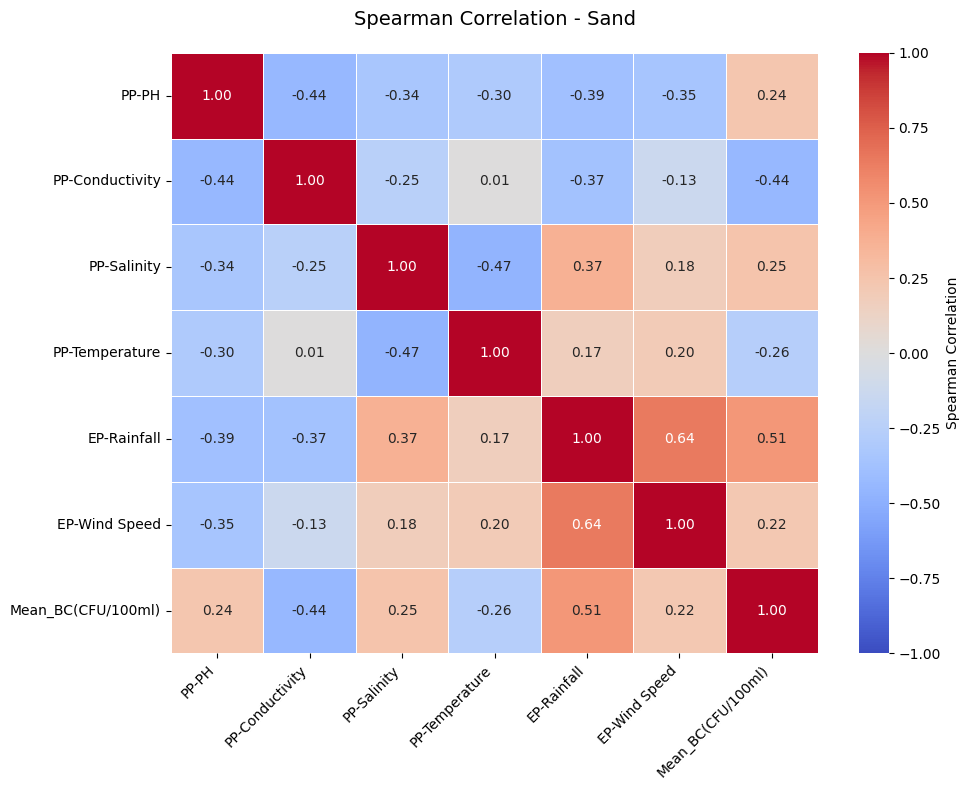

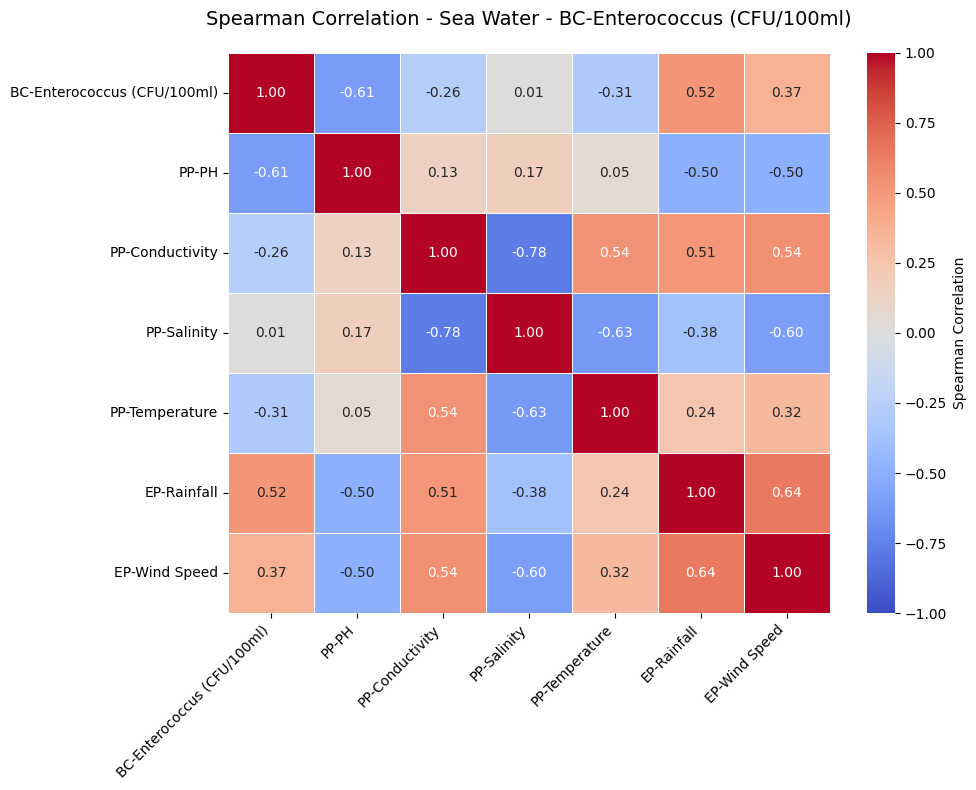

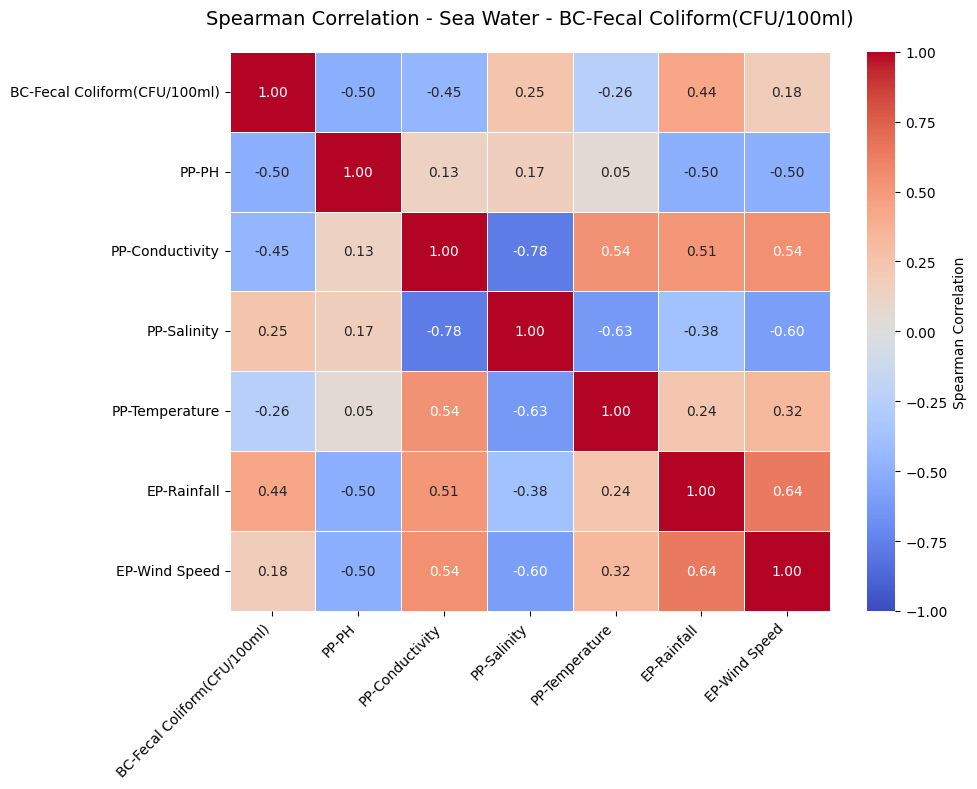

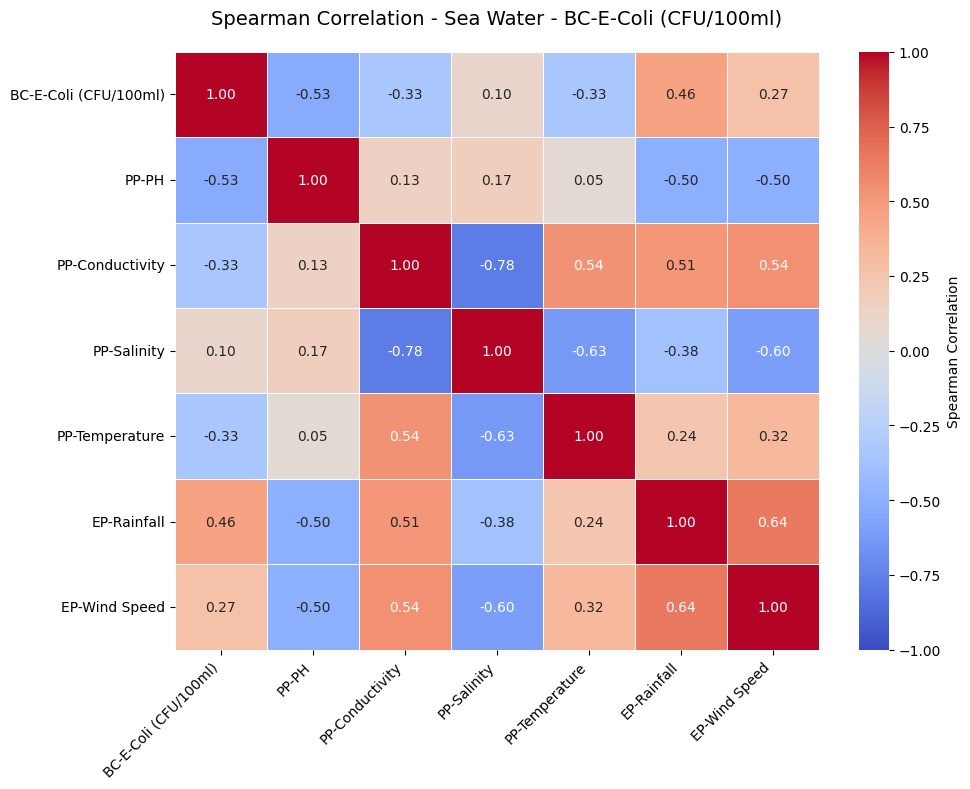

correlation coefficients for Mean Bacterial Count in Sea Water:
PP-PH                -0.528878
PP-Conductivity      -0.333333
PP-Salinity           0.098473
PP-Temperature       -0.330289
EP-Rainfall           0.460157
EP-Wind Speed         0.272727
Mean_BC(CFU/100ml)    1.000000
Name: Mean_BC(CFU/100ml), dtype: float64


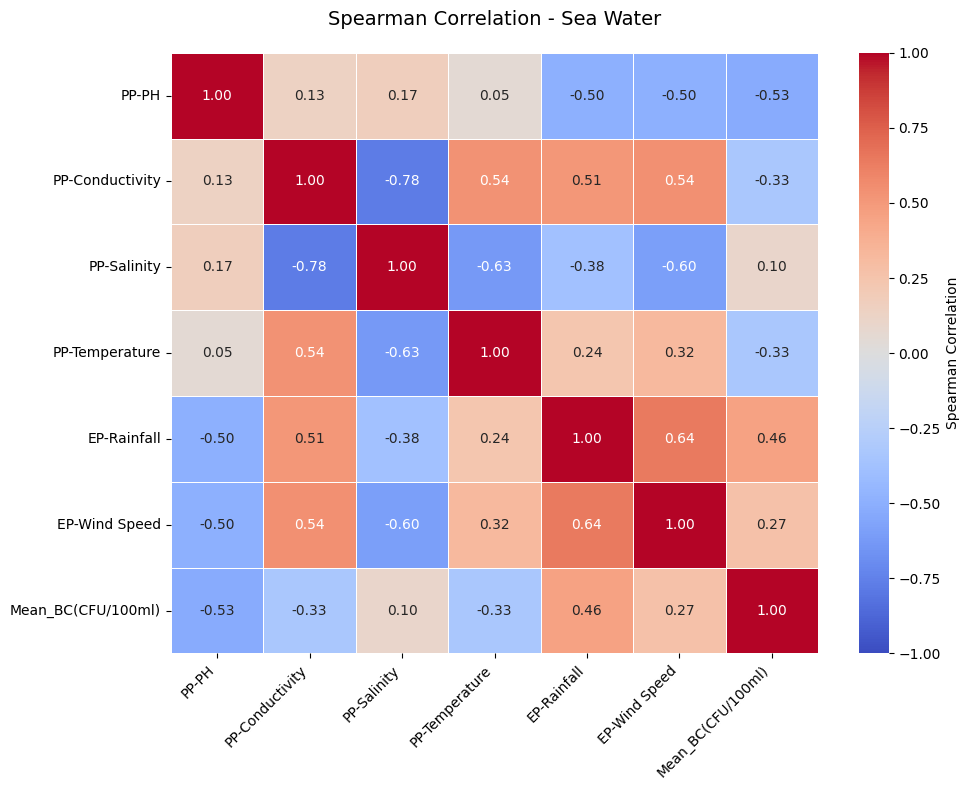

In [ ]:
# using spearman's rank correlation to calculate correlation coefficients
# also present it with a heatmap

# for each area
for area in areas:
    area_df = df[df['Area'] == area]
    filtered_df = area_df.loc[:, ~area_df.columns.isin(['Site','Area'])]

    # take mean of all columns across 3 sites
    filtered_mean_df = filtered_df.groupby('Week').mean().reset_index()
    filtered_mean_df.drop(columns='Week', inplace=True)

    ### analysis of bacterial counts between ep and pp for each bacteria
    area_separate_bacterial_coefficients = {}

    for bacteria in bacterial_names:
        # remove all the bacterial columns except the current bacterial column
        current_df = filtered_mean_df.drop(columns=[b for b in bacterial_names if b != bacteria])
        corr_matrix = current_df.corr(method='spearman') # for correlation matrix
        # print(f'correlation coefficients for {bacteria} in {area}:')
        # print(corr_matrix[bacteria])
        # store coefficients
        area_separate_bacterial_coefficients[bacteria] = corr_matrix[bacteria].to_dict()

        ## generate the heatmap
        plt.figure(figsize=(10, 8))
        heatmap = sns.heatmap(
            corr_matrix,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            center=0,
            vmin=-1,
            vmax=1,
            linewidths=0.5,
            cbar_kws={'label': 'Spearman Correlation'}
        )

        plt.title(f'Spearman Correlation - {area} - {bacteria}', pad=20, fontsize=14)
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()
        # plt.savefig(f'{output_dir}/correlation_{bacteria.replace('/', '_')}_{area}.png', dpi=300, bbox_inches='tight')
        # plt.close()

    separate_bacterial_coefficients[area] = area_separate_bacterial_coefficients

    ### analysis of bacterial counts between ep and pp for mean bacteria

    # calculate mean across three bacteria types
    filtered_mean_df['Mean_BC(CFU/100ml)'] = filtered_mean_df[bacterial_names].mean(axis=1)
    # drop other 3 bacteria columns
    filtered_mean_df.drop(columns=bacterial_names, inplace=True)
    # print(filtered_mean_df)
    mean_corr_matrix = filtered_mean_df.corr(method='spearman')
    print(f'correlation coefficients for Mean Bacterial Count in {area}:')
    print(mean_corr_matrix['Mean_BC(CFU/100ml)'])

    # generate the heatmap
    plt.figure(figsize=(10, 8))
    heatmap = sns.heatmap(
        mean_corr_matrix,
        annot=True,
        fmt=".2f",
        cmap='coolwarm',
        center=0,
        vmin=-1,
        vmax=1,
        linewidths=0.5,
        cbar_kws={'label': 'Spearman Correlation'}
    )

    plt.title(f'Spearman Correlation - {area}', pad=20, fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    # plt.savefig(f'{output_dir}/correlation_mean_bc_{area}.png', dpi=300, bbox_inches='tight')
    # plt.close()

In [ ]:
# with open('correlation_data.txt', 'w') as f:
#     json.dump(separate_bacterial_coefficients, f, indent=4)